In [208]:
pwd

'C:\\Users\\admin\\Downloads\\Project'

In [209]:
cd C:\Users\admin\Downloads\Project 

C:\Users\admin\Downloads\Project


In [210]:
pip install tensorflow

In [235]:
pip install keras

In [236]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [237]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [238]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [239]:
pwd

'C:\\Users\\admin\\Downloads\\Project'

In [240]:
ls

 Volume in drive C has no label.
 Volume Serial Number is B069-50E3

 Directory of C:\Users\admin\Downloads\Project

01-08-2022  20:30    <DIR>          .
01-08-2022  20:30    <DIR>          ..
01-08-2022  18:05    <DIR>          fruit-dataset
01-08-2022  18:06    <DIR>          Veg-dataset
01-08-2022  20:30       111,315,856 Vegetables.h5
               1 File(s)    111,315,856 bytes
               4 Dir(s)  59,552,387,072 bytes free


In [276]:
x_train=train_datagen.flow_from_directory('C:\\Users\\admin\\Downloads\\Project\\Veg-dataset\\train_set',target_size=(64,64),class_mode='categorical',batch_size=32)

Found 11386 images belonging to 9 classes.


In [277]:
x_test=test_datagen.flow_from_directory('C:\\Users\\admin\\Downloads\\Project\\Veg-dataset\\test_set',target_size=(64,64),class_mode='categorical',batch_size=32)

Found 3416 images belonging to 9 classes.


In [278]:
x_train.class_indices

{'Pepper_bell_Bacterial_spot': 0,
 'Pepper_bell_healthy': 1,
 'Potato_Early_blight': 2,
 'Potato_Late_blight': 3,
 'Potato_healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Late_blight': 6,
 'Tomato_Leaf_Mold': 7,
 'Tomato_Septoria_leaf_spot': 8}

CNN

In [279]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPool2D,Flatten

In [321]:
model=Sequential()

In [322]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [323]:
model.add(MaxPool2D(pool_size=(2,2)))

In [324]:
model.add(Flatten())

Hidden Layers

In [325]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

Output Layers

In [326]:
x_train.class_indices

{'Pepper_bell_Bacterial_spot': 0,
 'Pepper_bell_healthy': 1,
 'Potato_Early_blight': 2,
 'Potato_Late_blight': 3,
 'Potato_healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Late_blight': 6,
 'Tomato_Leaf_Mold': 7,
 'Tomato_Septoria_leaf_spot': 8}

In [327]:
model.add(Dense(4,activation='softmax'))

In [328]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [329]:
len(x_train)

356

In [330]:
len(x_test)

107

In [331]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'categorical_crossentropy/softmax_cross_entropy_with_logits' defined at (most recent call last):
    File "E:\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "E:\Anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "E:\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "E:\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "E:\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "E:\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "E:\Anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "E:\Anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "E:\Anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "E:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "E:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "E:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "E:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "E:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "E:\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "E:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "E:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "E:\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "E:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "E:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "E:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\admin\AppData\Local\Temp\ipykernel_15236\2778050854.py", line 1, in <cell line: 1>
      model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)
    File "E:\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "E:\Anaconda3\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "E:\Anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "E:\Anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\Anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "E:\Anaconda3\lib\site-packages\keras\engine\training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "E:\Anaconda3\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "E:\Anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "E:\Anaconda3\lib\site-packages\keras\losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "E:\Anaconda3\lib\site-packages\keras\losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "E:\Anaconda3\lib\site-packages\keras\losses.py", line 1787, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "E:\Anaconda3\lib\site-packages\keras\backend.py", line 5134, in categorical_crossentropy
      return tf.nn.softmax_cross_entropy_with_logits(
Node: 'categorical_crossentropy/softmax_cross_entropy_with_logits'
logits and labels must be broadcastable: logits_size=[32,4] labels_size=[32,9]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_train_function_13614]

In [197]:
ls


 Volume in drive C has no label.
 Volume Serial Number is B069-50E3

 Directory of C:\Users\admin\Downloads\Project

01-08-2022  18:04    <DIR>          .
01-08-2022  18:04    <DIR>          ..
01-08-2022  18:05    <DIR>          fruit-dataset
01-08-2022  18:06    <DIR>          Veg-dataset
               0 File(s)              0 bytes
               4 Dir(s)  59,806,130,176 bytes free


In [199]:
model.save('Vegetables.h5')

In [200]:
ls

 Volume in drive C has no label.
 Volume Serial Number is B069-50E3

 Directory of C:\Users\admin\Downloads\Project

01-08-2022  20:30    <DIR>          .
01-08-2022  20:30    <DIR>          ..
01-08-2022  18:05    <DIR>          fruit-dataset
01-08-2022  18:06    <DIR>          Veg-dataset
01-08-2022  20:30       111,315,856 Vegetables.h5
               1 File(s)    111,315,856 bytes
               4 Dir(s)  59,583,102,976 bytes free


Test the model

In [201]:
import numpy as np

In [202]:
from tensorflow.keras.models import load_model

In [203]:
from tensorflow.keras.preprocessing import image

In [204]:
model=load_model('Vegetables.h5')

In [205]:
pwd


'C:\\Users\\admin\\Downloads\\Project'

In [207]:
img=image.load_img('C:\\Users\\admin\\Downloads\\Project\\Veg_dataset\\test_set\\Pepper_bell_Bacterial_spot\\Spot 9059.jpeg')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\admin\\Downloads\\Project\\Veg_dataset\\test_set\\Pepper_bell_Bacterial_spot\\Spot 9059.jpeg'

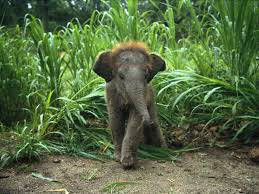

In [91]:
img

In [92]:
img=image.load_img("C:\\Users\\admin\\Downloads\\Practice\\dataset\\Testing\\elephants\\images (43).jpeg",target_size=(64,64))

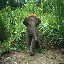

In [93]:
img

In [94]:
x=image.img_to_array(img)

In [95]:
x

array([[[ 40.,  60.,  51.],
        [ 35.,  55.,  46.],
        [ 16.,  36.,  27.],
        ...,
        [ 70., 112.,  48.],
        [ 60., 101.,  45.],
        [ 68., 105.,  61.]],

       [[  9.,  29.,  20.],
        [ 21.,  41.,  32.],
        [ 67.,  87.,  78.],
        ...,
        [ 66., 108.,  44.],
        [ 58.,  99.,  43.],
        [ 81., 117.,  79.]],

       [[ 16.,  36.,  25.],
        [ 34.,  54.,  43.],
        [ 29.,  49.,  38.],
        ...,
        [ 44.,  86.,  22.],
        [ 51.,  91.,  39.],
        [119., 157., 106.]],

       ...,

       [[103.,  99.,  88.],
        [102.,  99.,  84.],
        [115., 112.,  95.],
        ...,
        [113., 110.,  93.],
        [123., 121., 106.],
        [129., 124., 105.]],

       [[ 54.,  49.,  45.],
        [ 53.,  48.,  42.],
        [ 83.,  79.,  70.],
        ...,
        [129., 123., 109.],
        [107., 103.,  91.],
        [109., 104.,  85.]],

       [[ 61.,  69.,  56.],
        [ 76.,  81.,  75.],
        [ 92.,  

In [96]:
x.ndim

3

In [97]:
x.shape

(64, 64, 3)

In [98]:
x=np.expand_dims(x,axis=0)

In [99]:
x

array([[[[ 40.,  60.,  51.],
         [ 35.,  55.,  46.],
         [ 16.,  36.,  27.],
         ...,
         [ 70., 112.,  48.],
         [ 60., 101.,  45.],
         [ 68., 105.,  61.]],

        [[  9.,  29.,  20.],
         [ 21.,  41.,  32.],
         [ 67.,  87.,  78.],
         ...,
         [ 66., 108.,  44.],
         [ 58.,  99.,  43.],
         [ 81., 117.,  79.]],

        [[ 16.,  36.,  25.],
         [ 34.,  54.,  43.],
         [ 29.,  49.,  38.],
         ...,
         [ 44.,  86.,  22.],
         [ 51.,  91.,  39.],
         [119., 157., 106.]],

        ...,

        [[103.,  99.,  88.],
         [102.,  99.,  84.],
         [115., 112.,  95.],
         ...,
         [113., 110.,  93.],
         [123., 121., 106.],
         [129., 124., 105.]],

        [[ 54.,  49.,  45.],
         [ 53.,  48.,  42.],
         [ 83.,  79.,  70.],
         ...,
         [129., 123., 109.],
         [107., 103.,  91.],
         [109., 104.,  85.]],

        [[ 61.,  69.,  56.],
       

In [100]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 5s 5s/step


In [102]:
y

array([2], dtype=int64)

In [103]:
x_train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

In [104]:
index=['bears','crows','elephants','rats']

In [105]:
index[y[0]]

'elephants'

In [111]:
img=image.load_img("C:\\Users\\admin\\Downloads\\Practice\\dataset\\Testing\\elephants\\photo_1505148230895_d9a785a555fa.jpeg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['bears','crows','elephants','rats']
index[y[0]]

1/1 [==============================] - 0s 38ms/step


'elephants'

In [118]:
img=image.load_img("C:\\Users\\admin\\Downloads\\Practice\\dataset\\Testing\\crows\\Z1  (27).jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['bears','crows','elephants','rats']
index[y[0]]

1/1 [==============================] - 0s 31ms/step


'crows'

In [133]:
img=image.load_img("C:\\Users\\admin\\Downloads\\Practice\\dataset\\Testing\\bears\\k4 (81).jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['bears','crows','elephants','rats']
index[y[0]]

1/1 [==============================] - 0s 60ms/step


'bears'

In [129]:
img=image.load_img("C:\\Users\\admin\\Downloads\\Practice\\dataset\\Testing\\rats\\images (59).jpeg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['bears','crows','elephants','rats']
index[y[0]]

1/1 [==============================] - 0s 33ms/step


'rats'